# Hirearchical Clustering

In this notebook, we will be experimenting with agglomerative and DBSCAN clustering on the moon shaped dataset.

Here are the steps that we are going to follow:
1- Define and visualize the moon shaped dataset
2- Perform KMeans clustering on the dataset
3- Perform agglomerative clustering on the dataset
4- Perform DBSCAN clustering on the dataset
5- Compare the performance of each dataset, select the best, and justify

## Importing Libraries

* matplotlib : It’s plotting library, and we are going to use it for data visualization
* KMeans: Sklearn library for K-Means clustering
* AgglomerativeClustering: Sklearn library for Agglomerative clustering
* DBSCAN: Sklearn library for DBSCAN clustering
* make_moons: Sklearn library to generate synthetic two_moons data
* StandardScaler: Sklearn library to transform the data
* silhouette_score: Sklearn library to compute the clustering score
* mglearn: Provides practical examples and visualization to practice machine learning

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
import mglearn

## Let's start by creating and visualizing the dataset

In [85]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

Text(0, 0.5, 'Feature 1')

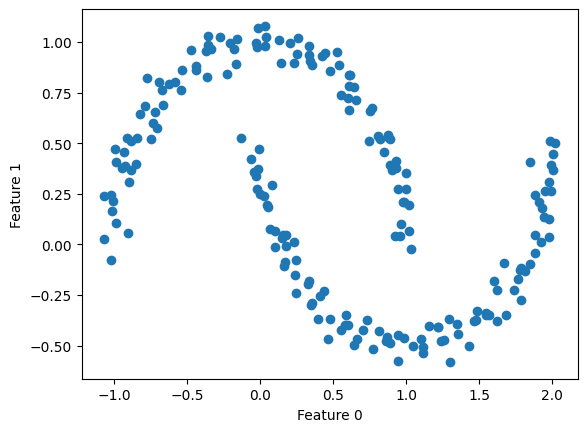

In [86]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As you can see, the data is scattered forming to separate moons. Our mission is create a clustering mechanism that can effectively separate each of the clusters correctly.

## Rescale the data to zero mean and unit variance using StandardScaler

In [87]:
'''
# Define the StandardScaler in a variable called 'scaler'
# Fit scaler on X
# transform the data and store it in a variable called 'X_scaler'
'''
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)




## KMeans Clustering

In [88]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans_cluster = kmeans.predict(X_scaled)

Text(0, 0.5, 'Feature 1')

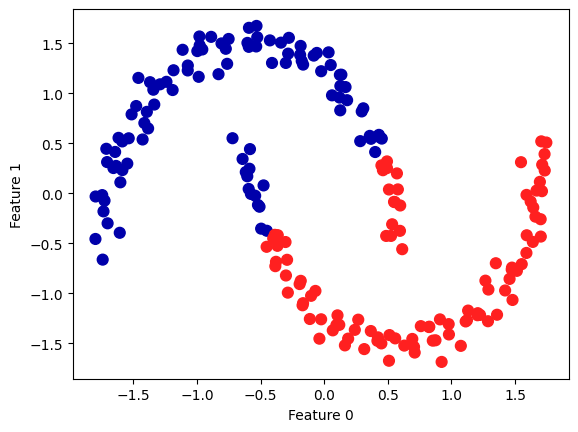

In [89]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_cluster, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Computing the silhouette score for KMe

In [90]:
silhouette_score(X_scaled, kmeans_cluster)

0.49304627727701233

## Agglomerative Clustering

In [91]:
'''
# Define and instance of AgglomerativeClustering
# Fit and predict on scaled X
'''
agglo = AgglomerativeClustering()
agg_clusters = agglo.fit_predict(X_scaled)
agg_clusters

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

### Plot the obtained agglomerative clusters

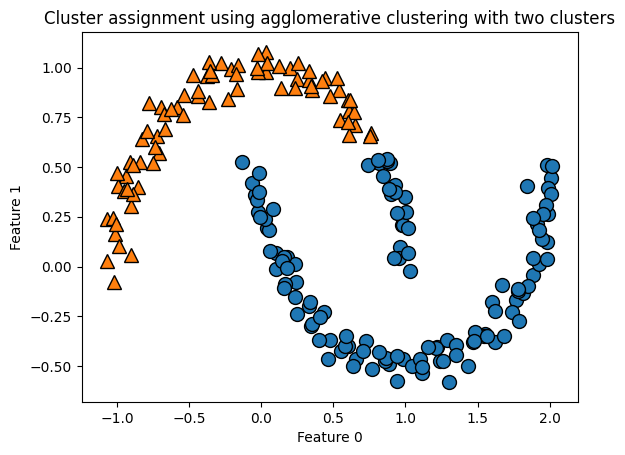

In [97]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], agg_clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Cluster assignment using agglomerative clustering with two clusters")
plt.show()

### Compute the silhouette score for the obtained agglomerative clusters

In [98]:
silhouette_score(X_scaled, agg_clusters)



0.4572323945292666

## DBSCAN

In [101]:
'''
# Define and instance of DBSCAN
# Fit and predict on scaled X
'''
dbscan = DBSCAN()
db_clusters = dbscan.fit_predict(X_scaled)

### Plot the obtained DBSCAN clusters

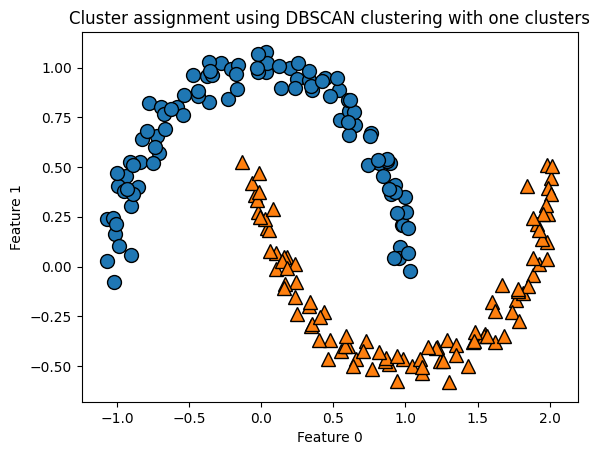

In [102]:


mglearn.discrete_scatter(X[:, 0], X[:, 1], db_clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Cluster assignment using DBSCAN clustering with one clusters")
plt.show()

### Compute the silhouette score for the obtained DBSCAN clusters

In [103]:
silhouette_score(X_scaled, db_clusters)

0.382386022679393

## Interpret the obtained results

### After performing the three separate unsupervised clustering techniques: KMeans, Agglomerative, and DBSCAN clustering, explain which algorithm is best and justify your answer.

For the two moon example, DBSCAN was the only one that split the moons correctly and had the lowest score. While the other two methods stumbled when reaching the closest points.